In [2]:
ls

Bangalore_House_predictor.ipynb  house_df.csv
Bengaluru_House_Data.csv         ridge_model.pkl
app.py


In [3]:
import pandas as pd
import numpy as np

house_df = pd.read_csv('Bengaluru_House_Data.csv')

In [4]:
house_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [7]:
house_df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
house_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
house_df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

<AxesSubplot:>

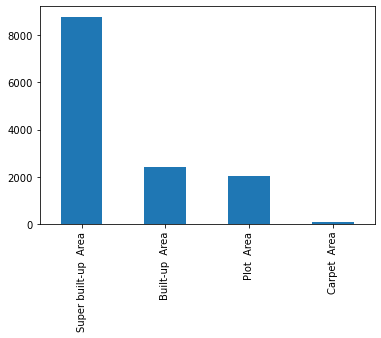

In [10]:
house_df['area_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

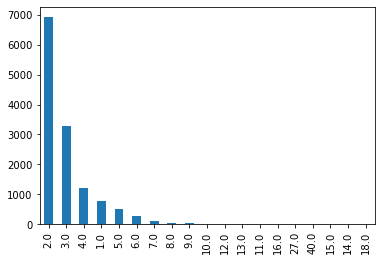

In [11]:
house_df['bath'].value_counts().plot(kind='bar')

In [12]:
house_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Dropping the columnns which are not required
1. Society - has many null values and morever the location column is sufficient to get the area name
2. area_type - Has mixed area types, for now we ignore this and later check if it is really useful
3. availability - Not useful, the availabily doesn't contribute to the price

In [13]:
house_df.drop(columns=['society','area_type','availability'],inplace=True)

In [14]:
house_df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [15]:
house_df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [16]:
house_df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [17]:
house_df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [18]:
house_df.dropna(subset=['location'],inplace=True)

In [19]:
house_df.isnull().sum()

location        0
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [20]:
house_df['size'].value_counts()

2 BHK         5199
3 BHK         4309
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [21]:
house_df['size'] = house_df['size'].str.split(" ").str[0]

In [22]:
house_df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Kothanur,2,1200,2.0,1.0,51.00


### When we consider all the non-na values for bedroom size, we see that the mean of bedroom size is 2.8 and around 80% of the rows have the 3 as the bedroom size, hence we populate the null values with 3

In [23]:
house_df[house_df['size'].notnull()]['size'].astype(int).mean()

2.803728482297226

In [24]:
np.percentile(house_df[house_df['size'].notnull()]['size'].astype(int), 80)

3.0

In [25]:
house_df['size'].fillna(3,inplace=True)

In [26]:
house_df.isnull().sum()

location        0
size            0
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [27]:
house_df['bath'].mean()

2.692586441189793

In [28]:
house_df['bath'].median()

2.0

In [29]:
house_df['bath'].fillna(2.0,inplace=True)

In [30]:
house_df.isnull().sum()

location        0
size            0
total_sqft      0
bath            0
balcony       609
price           0
dtype: int64

In [31]:
house_df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Kothanur,2,1200,2.0,1.0,51.00


In [32]:
house_df['size'].astype('category').cat.codes.corr(house_df['balcony'].astype('category').cat.codes)

0.15513701400031982

In [33]:
house_df[house_df['balcony'].notnull()]['size'].astype('category').cat.codes.corr(house_df[house_df['balcony'].notnull()]['balcony'].astype('category').cat.codes)

0.2767969120975863

### There is found to be no strong correlation between the no of bedroom present in the house and the no of balconies present. 

In [34]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'No of balconies')

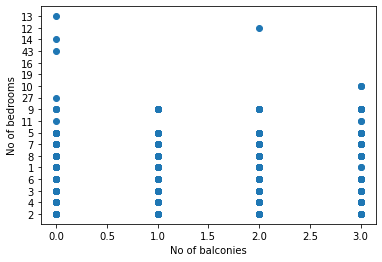

In [35]:
plt.scatter(house_df['balcony'],house_df['size'].astype('str'))
plt.ylabel('No of bedrooms')
plt.xlabel('No of balconies')

In [36]:
house_df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Kothanur,2,1200,2.0,1.0,51.00


In [37]:
house_df['size'] = house_df['size'].astype('int')

In [38]:
house_df['total_sqft'].tolist()

['1056',
 '2600',
 '1440',
 '1521',
 '1200',
 '1170',
 '2732',
 '3300',
 '1310',
 '1020',
 '1800',
 '2785',
 '1000',
 '1100',
 '2250',
 '1175',
 '1180',
 '1540',
 '2770',
 '1100',
 '600',
 '1755',
 '2800',
 '1767',
 '510',
 '1250',
 '660',
 '1610',
 '1151',
 '1025',
 '2100 - 2850',
 '1075',
 '1760',
 '1693',
 '1925',
 '700',
 '1070',
 '1724',
 '1290',
 '1143',
 '1296',
 '1254',
 '600',
 '660',
 '1330.74',
 '600',
 '970',
 '1459',
 '800',
 '869',
 '1270',
 '1670',
 '2010',
 '1185',
 '1600',
 '1200',
 '3010 - 3410',
 '1500',
 '1407',
 '840',
 '4395',
 '845',
 '5700',
 '1160',
 '3000',
 '1100',
 '1140',
 '1220',
 '1350',
 '1005',
 '500',
 '1358',
 '1569',
 '1240',
 '2089',
 '1206',
 '1150',
 '2511',
 '460',
 '4400',
 '1660',
 '2957 - 3450',
 '1326',
 '1325',
 '1499',
 '3000',
 '1665',
 '708',
 '1060',
 '710',
 '1000',
 '1000',
 '1450',
 '1200',
 '1296',
 '1540',
 '2894',
 '1330',
 '1200',
 '1200',
 '2502',
 '650',
 '2400',
 '1007',
 '1200',
 '966',
 '1630',
 '1640',
 '782',
 '1260',
 '180

In [39]:
import re
re.findall(r'(\d+(?:\.\d+)?)', "34Sq. Meter")

['34']

In [40]:
print('650 - 665'.split('-'))

['650 ', ' 665']


In [41]:
import re 

def get_sqft(row):
    
    #Check if the row has '-', if it does take the average
    result = row.split('-')
    if len(result) > 1:
        value1 = result[0]
        value2 = result[1]
        
        return (float(value1) + float(value2))/2
    
    else:
        # Extract only the floating and int numbers
        return re.findall(r'(\d+(?:\.\d+)?)',row)[0]


In [42]:
house_df['total_sqft'][30:40]

30    2100 - 2850
31           1075
32           1760
33           1693
34           1925
35            700
36           1070
37           1724
38           1290
39           1143
Name: total_sqft, dtype: object

In [43]:
house_df['total_sqft'] = house_df['total_sqft'].apply(get_sqft)

In [44]:
house_df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Kothanur,2,1200,2.0,1.0,51.00


In [45]:
house_df['total_sqft'] = house_df['total_sqft'].astype('float')

In [46]:
house_df[house_df['balcony'].notnull()].corr()

,size,total_sqft,bath,balcony,price
size,1.000000,0.347128,0.887816,0.187285,0.406979
total_sqft,0.347128,1.000000,0.392324,0.149553,0.556086
bath,0.887816,0.392324,1.000000,0.204191,0.459736
balcony,0.187285,0.149553,0.204191,1.000000,0.120363
price,0.406979,0.556086,0.459736,0.120363,1.000000


### From the above correlation table, we can see that the balcony column does not have any strong correlation with any of the other columns.

In [47]:
house_df['balcony'].isnull().sum()

609

In [48]:
house_df['bed_bath'] = house_df['size'] + house_df['bath']

In [49]:
house_df[house_df['balcony'].notnull()].corr()

,size,total_sqft,bath,balcony,price,bed_bath
size,1.000000,0.347128,0.887816,0.187285,0.406979,0.971051
total_sqft,0.347128,1.000000,0.392324,0.149553,0.556086,0.380752
bath,0.887816,0.392324,1.000000,0.204191,0.459736,0.972043
balcony,0.187285,0.149553,0.204191,1.000000,0.120363,0.201545
price,0.406979,0.556086,0.459736,0.120363,1.000000,0.446280
bed_bath,0.971051,0.380752,0.972043,0.201545,0.446280,1.000000


In [50]:
house_df.drop(columns='bed_bath',inplace=True)

In [51]:
house_df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Kothanur,2,1200.0,2.0,1.0,51.00


There are two ways to handle this situation.

1. Either drop all the null values present in the balcony column
2. Fill it with some value - but from the correlation we see there is nothing that is strongly correlated
3. One more way could be to subsitute the values from either the mean, median or some other sutiable value

In [52]:
house_df['balcony'].value_counts()

2.0    5112
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [53]:
house_df['balcony'].fillna(2,inplace=True)

In [54]:
house_df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [55]:
house_df['size'].describe()

count    13319.000000
mean         2.803964
std          1.294261
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         43.000000
Name: size, dtype: float64

There are rows with 43 bedrooms - Finding out all the outliers and eliminating them

We only consider the cases where the bedrooms are < 10

In [56]:
house_df[house_df['size'] > 10]

,location,size,total_sqft,bath,balcony,price
459,1 Giri Nagar,11,5000.0,9.0,3.0,360.0
1718,2Electronic City Phase II,27,8000.0,27.0,0.0,230.0
1768,1 Ramamurthy Nagar,11,1200.0,11.0,0.0,170.0
3379,1Hanuman Nagar,19,2000.0,16.0,2.0,490.0
3609,Koramangala Industrial Layout,16,10000.0,16.0,2.0,550.0
3853,1 Annasandrapalya,11,1200.0,6.0,3.0,150.0
4684,Munnekollal,43,2400.0,40.0,0.0,660.0
4916,1Channasandra,14,1250.0,15.0,0.0,125.0
6533,Mysore Road,12,2232.0,6.0,2.0,300.0
7979,1 Immadihalli,11,6000.0,12.0,2.0,150.0


In [57]:
house_df = house_df[house_df['size'] < 10]

In [58]:
house_df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Kothanur,2,1200.0,2.0,1.0,51.00


The column 'price' has values present in Lakhs, hence we multiply it by 100000 and divide by the total sqft in order to get the price per sqft for every property

In [59]:
house_df['price per sqft'] = (house_df['price'] * 100000 ) / house_df['total_sqft']

In [60]:
house_df.head()

,location,size,total_sqft,bath,balcony,price,price per sqft
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000


In [61]:
house_df

,location,size,total_sqft,bath,balcony,price,price per sqft
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,0.0,231.00,6689.834926
13316,Richards Town,4,3600.0,5.0,2.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,1.0,488.00,10407.336319


In [62]:
house_df.describe()

,size,total_sqft,bath,balcony,price,price per sqft
count,13293.000000,13293.000000,13293.000000,13293.000000,13293.000000,1.329300e+04
mean,2.783420,1551.965706,2.669224,1.602949,111.954273,1.234026e+04
std,1.167813,1229.568120,1.227340,0.802698,145.609221,2.258680e+05
min,1.000000,1.000000,1.000000,0.000000,8.000000,2.678298e+02
25%,2.000000,1100.000000,2.000000,1.000000,50.000000,4.271186e+03
50%,3.000000,1275.000000,2.000000,2.000000,72.000000,5.441640e+03
75%,3.000000,1676.000000,3.000000,2.000000,120.000000,7.330677e+03
max,9.000000,52272.000000,14.000000,3.000000,2912.000000,1.600000e+07


For all the sites, wherever the location is not found to be more than 10 times, we just label that as other

In [63]:
house_df.loc[house_df['location'].map(house_df['location'].value_counts() < 10), 'location'] = 'Other'

In [64]:
house_df['location'].value_counts()

Other               2763
Whitefield           540
Sarjapur  Road       399
Electronic City      302
Kanakpura Road       273
                    ... 
Basapura              10
Dodsworth Layout      10
Kalkere               10
Ganga Nagar           10
Nagadevanahalli       10
Name: location, Length: 254, dtype: int64

In [65]:
house_df.head()

,location,size,total_sqft,bath,balcony,price,price per sqft
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000


We can also calculate sqft per room. And if there is any property that has a room less than 350 sft, we consider it to be an outlier and neglect it

In [66]:
house_df['sqft per room'] = house_df['total_sqft'] / house_df['size']

In [67]:
house_df['sqft per room'].describe()

count    13293.000000
mean       573.690484
std        387.988900
min          0.250000
25%        473.000000
50%        552.000000
75%        625.000000
max      26136.000000
Name: sqft per room, dtype: float64

In [68]:
house_df = house_df[house_df['sqft per room'] > 350]

In [69]:
house_df.describe()

,size,total_sqft,bath,balcony,price,price per sqft,sqft per room
count,12142.000000,12142.000000,12142.000000,12142.000000,12142.000000,12142.000000,12142.000000
mean,2.617279,1605.993610,2.530885,1.611596,110.579295,6178.541571,606.252250
std,0.917236,1266.836899,1.020501,0.793697,149.975160,3994.154976,389.773274
min,1.000000,351.000000,1.000000,0.000000,8.440000,267.829813,350.666667
25%,2.000000,1125.000000,2.000000,1.000000,49.270000,4200.000000,500.000000
50%,3.000000,1310.000000,2.000000,2.000000,69.610000,5263.157895,566.666667
75%,3.000000,1712.750000,3.000000,2.000000,115.000000,6805.300756,634.250000
max,9.000000,52272.000000,14.000000,3.000000,2912.000000,176470.588235,26136.000000


In [70]:
house_df.corr()

,size,total_sqft,bath,balcony,price,price per sqft,sqft per room
size,1.000000,0.536468,0.854595,0.263396,0.485684,0.274061,0.053883
total_sqft,0.536468,1.000000,0.541573,0.156681,0.591650,0.224375,0.745802
bath,0.854595,0.541573,1.000000,0.249511,0.530975,0.313171,0.125933
balcony,0.263396,0.156681,0.249511,1.000000,0.122520,0.034358,0.017993
price,0.485684,0.591650,0.530975,0.122520,1.000000,0.705560,0.319849
price per sqft,0.274061,0.224375,0.313171,0.034358,0.705560,1.000000,0.096599
sqft per room,0.053883,0.745802,0.125933,0.017993,0.319849,0.096599,1.000000


To eliminate the outliers we eliminate the rows that is not present in the first SD of 'price per sqft' 

In [71]:
def remove_sqft_outlier(data):
    output = pd.DataFrame()
    for key, row in data.groupby('location'):
        mean_sqft = np.mean(row['price per sqft'])

        std_sqft = np.std(row['price per sqft'])

        temp = row[(row['price per sqft'] > (mean_sqft - std_sqft)) & (row['price per sqft'] <= (mean_sqft + std_sqft))]

        output = pd.concat([output, temp],ignore_index=True)

    return output

In [72]:
house_df = remove_sqft_outlier(house_df)

In [73]:
house_df.describe()

,size,total_sqft,bath,balcony,price,price per sqft,sqft per room
count,9845.000000,9845.000000,9845.000000,9845.000000,9845.000000,9845.000000,9845.000000
mean,2.553580,1514.420155,2.456069,1.615439,91.472768,5625.002974,589.654536
std,0.843564,874.183409,0.926727,0.784478,88.309570,2218.484209,215.381255
min,1.000000,351.000000,1.000000,0.000000,10.000000,1250.000000,350.666667
25%,2.000000,1115.000000,2.000000,1.000000,49.360000,4250.000000,500.000000
50%,2.000000,1296.000000,2.000000,2.000000,67.000000,5165.631470,564.000000
75%,3.000000,1650.000000,3.000000,2.000000,100.000000,6385.341477,627.500000
max,9.000000,30400.000000,9.000000,3.000000,2200.000000,24509.803922,10030.000000


In [74]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9845 entries, 0 to 9844
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        9845 non-null   object 
 1   size            9845 non-null   int64  
 2   total_sqft      9845 non-null   float64
 3   bath            9845 non-null   float64
 4   balcony         9845 non-null   float64
 5   price           9845 non-null   float64
 6   price per sqft  9845 non-null   float64
 7   sqft per room   9845 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 615.4+ KB


In [75]:
def bedrooms_outliers(data):
    exclude_indices = np.array([])
    
    for location, row in data.groupby('location'):
        bhk_status = {}
        
        for bhk, bhk_df in row.groupby('size'):
            bhk_status[bhk] = {
                'mean': np.mean(bhk_df['price per sqft']),
                'std': np.std(bhk_df['price per sqft']),
                'count': bhk_df.shape[0]
            }
        
        
        for bhk, bhk_df in row.groupby('size'):
            stats = bhk_status.get(bhk-1)
            
            if stats and stats['count'] > 5:
#                 print(stats)
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price per sqft'] < (stats['mean'])].index.values)
                
    return data.drop(exclude_indices, axis='index')
        
            
#         for bhk, bhk_df in location_df.groupby('')

In [76]:
house_df = bedrooms_outliers(house_df)

In [77]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7102 entries, 1 to 9843
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        7102 non-null   object 
 1   size            7102 non-null   int64  
 2   total_sqft      7102 non-null   float64
 3   bath            7102 non-null   float64
 4   balcony         7102 non-null   float64
 5   price           7102 non-null   float64
 6   price per sqft  7102 non-null   float64
 7   sqft per room   7102 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 499.4+ KB


In [78]:
house_df.drop(['price per sqft','sqft per room'],inplace=True,axis=1)

In [79]:
house_df.to_csv('house_df.csv')

In [80]:
X = house_df.drop(columns='price')
y = house_df['price']

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [82]:
X_train.shape,X_test.shape

((5681, 5), (1421, 5))

In [83]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

column_trans = make_column_transformer((OneHotEncoder(sparse=False,handle_unknown='ignore'), ['location']),
                                remainder='passthrough')

scaler = StandardScaler()

lr = LinearRegression(normalize=True)

pipeline = make_pipeline(column_trans,scaler,lr)

In [84]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [85]:
y_pred = pipeline.predict(X_test)

In [86]:
from sklearn.metrics import r2_score

print("R2 using Linear {}".format(r2_score(y_test, y_pred)))

R2 using Linear 0.8687047872053679


In [87]:
lass_reg = Lasso()

pipeline = make_pipeline(column_trans,scaler,lass_reg)

In [88]:
pipeline.fit(X_train,y_train)

y_pred = pipeline.predict(X_test)

print("R2 using Lasoo {}".format(r2_score(y_test, y_pred)))

R2 using Lasoo 0.8666391100030405


In [89]:
ridge_reg = Ridge()

pipeline = make_pipeline(column_trans,scaler,ridge_reg)

In [90]:
pipeline.fit(X_train,y_train)

y_pred = pipeline.predict(X_test)

print("R2 using Ridge {}".format(r2_score(y_test, y_pred)))

R2 using Ridge 0.8685790101667776


In [91]:
import pickle

pickle.dump(pipeline, open('ridge_model.pkl','wb'))

In [95]:
house_df['location'].unique().tolist()

[' Devarachikkanahalli',
 '1st Block Jayanagar',
 '1st Block Koramangala',
 '1st Phase JP Nagar',
 '2nd Phase Judicial Layout',
 '2nd Stage Nagarbhavi',
 '5th Block Hbr Layout',
 '5th Phase JP Nagar',
 '6th Phase JP Nagar',
 '7th Phase JP Nagar',
 '8th Phase JP Nagar',
 '9th Phase JP Nagar',
 'AECS Layout',
 'Abbigere',
 'Akshaya Nagar',
 'Ambalipura',
 'Ambedkar Nagar',
 'Amruthahalli',
 'Anandapura',
 'Ananth Nagar',
 'Anekal',
 'Anjanapura',
 'Ardendale',
 'Arekere',
 'Attibele',
 'BEML Layout',
 'BTM 1st Stage',
 'BTM 2nd Stage',
 'BTM Layout',
 'Babusapalaya',
 'Badavala Nagar',
 'Balagere',
 'Banashankari',
 'Banashankari Stage II',
 'Banashankari Stage III',
 'Banashankari Stage V',
 'Banashankari Stage VI',
 'Banaswadi',
 'Banjara Layout',
 'Bannerghatta',
 'Bannerghatta Road',
 'Basapura',
 'Basavangudi',
 'Basaveshwara Nagar',
 'Battarahalli',
 'Begur',
 'Begur Road',
 'Bellandur',
 'Benson Town',
 'Bharathi Nagar',
 'Bhoganhalli',
 'Billekahalli',
 'Binny Pete',
 'Bisuvanaha

In [96]:
X_train

,location,size,total_sqft,bath,balcony
2595,Haralur Road,2,1194.0,2.0,2.0
8571,Thanisandra,2,1056.0,2.0,2.0
1732,Dodda Nekkundi,2,1370.0,2.0,2.0
1789,Domlur,2,1050.0,2.0,2.0
9415,Whitefield,3,1655.0,3.0,1.0
...,...,...,...,...,...
686,Banashankari,3,2582.0,5.0,2.0
7764,Ramagondanahalli,2,1151.0,2.0,2.0
1631,Cox Town,3,1600.0,3.0,1.0
1844,Electronic City,2,1128.0,2.0,1.0
